<a href="https://colab.research.google.com/github/Ofigu/Sign-Language-Digits-Neural-Network/blob/main/Sign_Language_Digits_With_NumPy_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please copy it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Ofir Almog 207918731
<br>
Student 2: Adir Edri 206991762

## Sign Language Digits With NumPy
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

## Dwonload Dataset

In [2]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 543 µs (started: 2024-12-23 14:48:37 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [3]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 51.2 ms (started: 2024-12-23 14:48:37 +00:00)


## Data preprocessing (10%)

### Feature scaling

In [4]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 5000)
time: 12.6 ms (started: 2024-12-23 14:48:37 +00:00)


### Select two classes

In [5]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)
# Use y1 instead of Y since that's your original labels
print("Original label values:", np.unique(y1))

# Create masks from original labels y1
class_6_indices = (y1[0] == '6')  # Use y1[0] since y1 is shape (1, 5000)
class_7_indices = (y1[0] == '7')  # Use y1[0] since y1 is shape (1, 5000)

# Select data and labels
X = X1[:, class_6_indices | class_7_indices]
Y = y1[:, class_6_indices | class_7_indices]

# Convert to binary labels
Y = (Y == '7').astype(int)

print("\nAfter selection:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("Binary label distribution:", np.unique(Y, return_counts=True))

Original label values: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']

After selection:
X shape: (784, 1000)
Y shape: (1, 1000)
Binary label distribution: (array([0, 1]), array([500, 500]))
time: 12.3 ms (started: 2024-12-23 14:48:37 +00:00)


### Split the data into Train set and Test set

In [6]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = X.T  # transpose
Y = Y.ravel()  # flat multi dimension array into 1 dimensional

# data balance before split
print("\nCheck data balance before split:")
print("Original Y values distribution:", np.unique(Y, return_counts=True))

# Get indices for each class
class_0_indices = np.where(Y == 0)[0]
class_1_indices = np.where(Y == 1)[0]

# Split each class separately (80% train, 20% test)
train_0 = class_0_indices[:int(0.8 * len(class_0_indices))] #select all elements from start until index at 80% of the length
test_0 = class_0_indices[int(0.8 * len(class_0_indices)):] #select all elements from index at 80% of the length until end
train_1 = class_1_indices[:int(0.8 * len(class_1_indices))]
test_1 = class_1_indices[int(0.8 * len(class_1_indices)):]

# Combine indices
train_indices = np.concatenate([train_0, train_1])
test_indices = np.concatenate([test_0, test_1])

# Create train and test sets
X_train = X[train_indices].T
X_test = X[test_indices].T
Y_train = Y[train_indices].reshape(-1, 1)
Y_test = Y[test_indices].reshape(-1, 1)

print("\nClass distribution in training set:")
print("Y_train unique values and counts:", np.unique(Y_train, return_counts=True))
print("\nClass distribution in test set:")
print("Y_test unique values and counts:", np.unique(Y_test, return_counts=True))


Check data balance before split:
Original Y values distribution: (array([0, 1]), array([500, 500]))

Class distribution in training set:
Y_train unique values and counts: (array([0, 1]), array([400, 400]))

Class distribution in test set:
Y_test unique values and counts: (array([0, 1]), array([100, 100]))
time: 8.68 ms (started: 2024-12-23 14:48:37 +00:00)


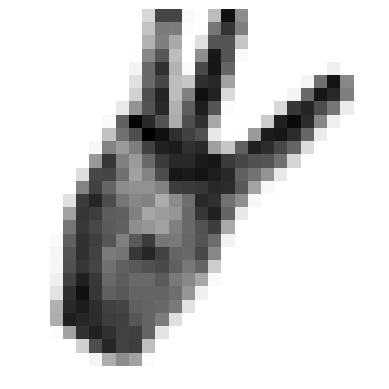

0

time: 126 ms (started: 2024-12-23 14:48:37 +00:00)


In [7]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)

time: 144 ms (started: 2024-12-23 14:48:37 +00:00)


In [8]:
#TODO: Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

time: 510 µs (started: 2024-12-23 14:48:37 +00:00)


## Loss Function (10%)

The BCE Loss function embodies the idea that the neural network should incur a substantial penalty (i.e., Loss tending toward infinity) when the predicted probability diverges significantly from the actual label of the training example. Conversely, the Loss should be zero (Loss = 0) when the predicted probability aligns perfectly with the label of the training example. In simpler terms, the BCE Loss should be zero in the following two situations:

- When the example has a positive label (${y} = 1$), the neural network should be entirely confident that the example belongs to the positive class, i.e., ($\hat{p} = 1 $).
- When the example has a negative label (${y} = 0$), the neural network should be entirely confident that the example does not belong to the positive class, i.e., ($\hat{p} = 0 $).

**It's important to note that when working with computers, extremely high or low values can sometimes be unmanageable and might even lead to system crashes. To address this, you must be aware of the range of values that cause the logarithm to yield infinity or negative infinity. Ensure you handle these edge cases within your function.**


In [9]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    epsilon = 1e-15  # avoid log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return float(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

time: 493 µs (started: 2024-12-23 14:48:37 +00:00)


## NN Hyper Parameters

In [10]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 64
learning_rate = 0.01
epochs = 40

time: 370 µs (started: 2024-12-23 14:48:37 +00:00)


## Weight and Bias Initialization

In [11]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(64, 784)
(64, 1)
(1, 64)
(1, 1)
time: 3.9 ms (started: 2024-12-23 14:48:37 +00:00)


## Training (30%)

In [12]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
num_of_examples = X.shape[1]

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(num_of_examples):
    # TODO :  Forward propagation

    Z1 = np.matmul(W1, X[:,j].reshape(-1,1)) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)
    Yout = Y[j].reshape(-1,1)

    # TODO: Compute loss
    loss = log_loss( A2, Yout)
    avg_epoch_loss = avg_epoch_loss + loss

    # # TODO: Back propagation
    dZ2 = (A2-Yout)
    dW2 = np.matmul(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * (A1 * (1-A1))
    dW1 = np.matmul(dZ1, X[:,j].reshape(1,-1))
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    # TODO: Update weights
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

  avg_epoch_loss = avg_epoch_loss/num_of_examples
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

<ipython-input-9-7d5c825324cc>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))


Epoch 0  Loss: 0.2083604687529118
Epoch 1  Loss: 0.2804714239480839
Epoch 2  Loss: 0.2080881602809033
Epoch 3  Loss: 0.16866493667831076
Epoch 4  Loss: 0.1448189331699978
Epoch 5  Loss: 0.12859577458934462
Epoch 6  Loss: 0.11653192936409422
Epoch 7  Loss: 0.10700894299671336
Epoch 8  Loss: 0.09921116112302064
Epoch 9  Loss: 0.09268816578088789
Epoch 10  Loss: 0.08716518677902851
Epoch 11  Loss: 0.08244579015882263
Epoch 12  Loss: 0.07836942178274442
Epoch 13  Loss: 0.07480640081442161
Epoch 14  Loss: 0.07165859610300589
Epoch 15  Loss: 0.06885296296741346
Epoch 16  Loss: 0.06633272519686362
Epoch 17  Loss: 0.06405099550913854
Epoch 18  Loss: 0.06196752318737297
Epoch 19  Loss: 0.06004753683761779
Epoch 20  Loss: 0.05826148834250573
Epoch 21  Loss: 0.05658491560629198
Epoch 22  Loss: 0.0549981373572767
Epoch 23  Loss: 0.05348576944884491
Epoch 24  Loss: 0.05203613612201248
Epoch 25  Loss: 0.0506406569111945
Epoch 26  Loss: 0.049293269077136416
Epoch 27  Loss: 0.047989911410533555
Epoch 

### Loss Visualization

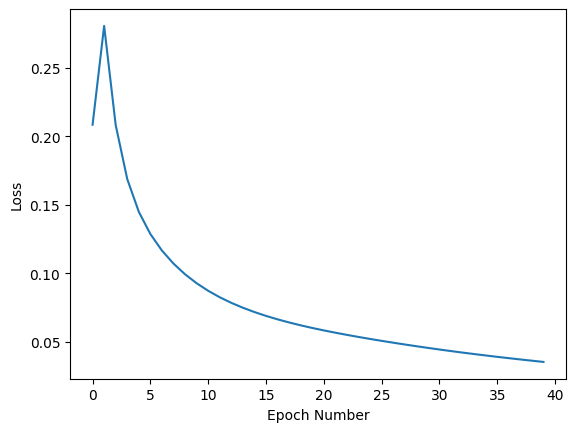

time: 201 ms (started: 2024-12-23 14:49:06 +00:00)


In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (20%)

Accuracy: 92.00 %


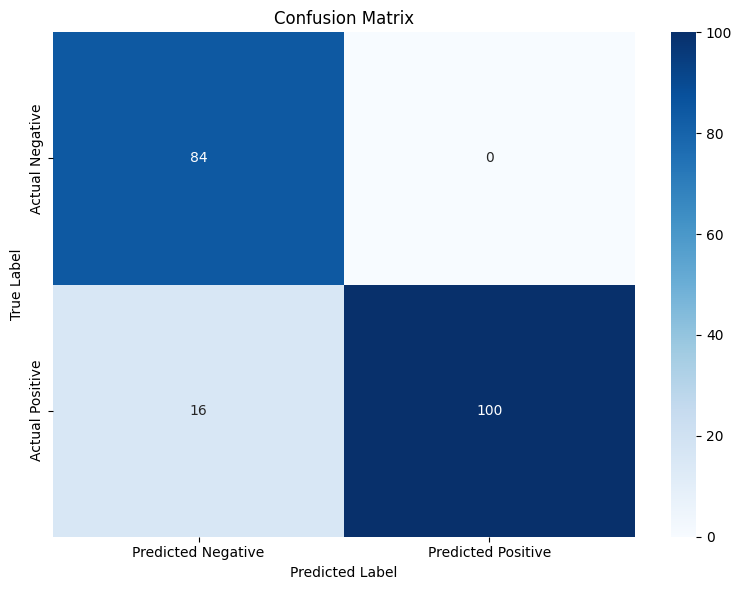

Confusion Matrix:
True Negatives (TN): 84
False Positives (FP): 0
False Negatives (FN): 16
True Positives (TP): 100
time: 705 ms (started: 2024-12-23 14:52:17 +00:00)


In [17]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5):
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]

# Calculate confusion matrix
cm = confusion_matrix(predictions.T, labels.T)

# Calculate accuracy
accuracy = accuracy_score(labels.T, predictions.T)
print(f"Accuracy: {accuracy * 100:.2f} %")

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Print confusion matrix details
print("Confusion Matrix:")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

### Visualize the results

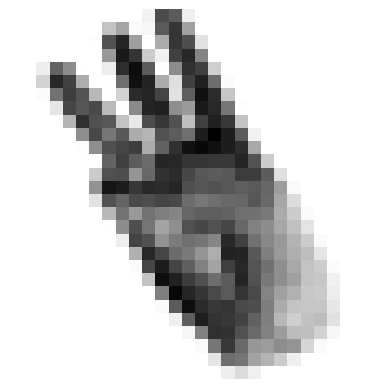

Real= 0 Predicted= [[0.15522307]]


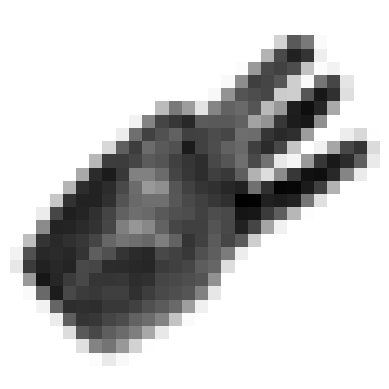

Real= 0 Predicted= [[0.31157897]]


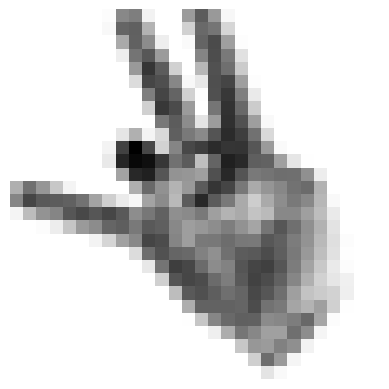

Real= 1 Predicted= [[0.98735733]]


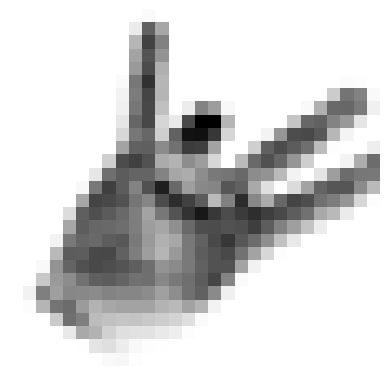

Real= 1 Predicted= [[0.96267891]]


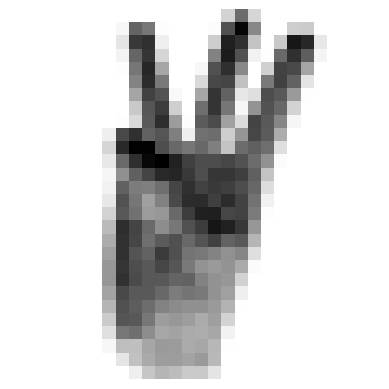

Real= 0 Predicted= [[0.02585605]]


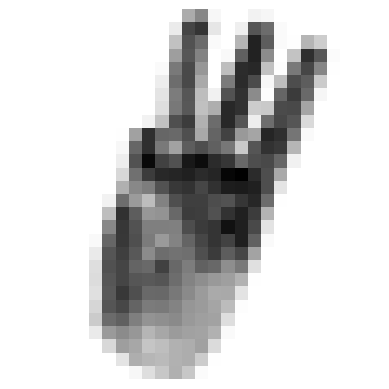

Real= 0 Predicted= [[0.17832458]]


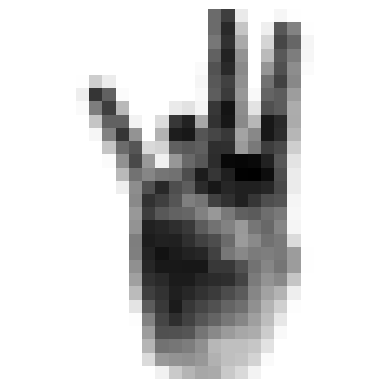

Real= 1 Predicted= [[0.99993802]]


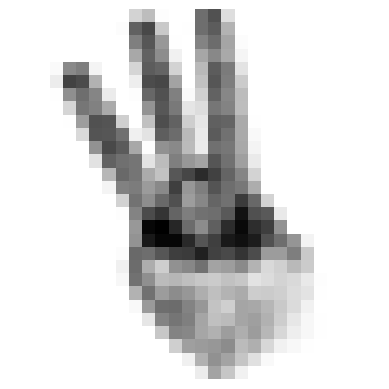

Real= 0 Predicted= [[0.03232538]]


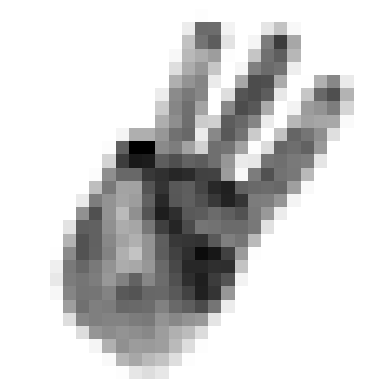

Real= 0 Predicted= [[0.39218169]]


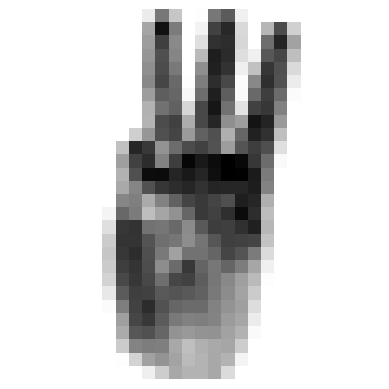

Real= 0 Predicted= [[0.05528766]]
time: 710 ms (started: 2024-12-23 14:52:26 +00:00)


In [18]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random
for example in range(10):
  i = random.randint(200)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]

  # TODO :  Forward propagation
  Z1 = np.matmul(W1,X_test[:,i])
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2, A1) + b2
  A2 = sigmoid(Z2)
  Yout = Y[i,0]
  print("Real=", Y_test[i,0], "Predicted=",A2)